<a href="https://colab.research.google.com/github/Void-Brain70/Machine_Learning/blob/main/Petrol_Consumption_Multivariable_Linear_Regression_Without_SK_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






**Petrol_Consumption_Multivariable_Linear_Regression_Without_SK-Learn**

In [9]:
# dataset

import os
import io
import pandas as pd
import matplotlib.pyplot as plt # for ploting
import seaborn as sns # for ploting 3D data
%matplotlib inline

df = pd.read_csv('/content/petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [10]:
df = df.rename(columns={'Petrol_tax': 'x1', 'Average_income': 'x2', 'Paved_Highways': 'x3', 'Population_Driver_licence(%)': 'x4', 'Petrol_Consumption': 'y'})
df.head()

,x1,x2,x3,x4,y
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [11]:
x1 = df.x1
x2 = df.x2 
x3 = df.x3 
x4 = df.x4
y  = df.y 

In [12]:
def predict(t0,t1,t2,t3,t4,x1,x2,x3,x4):
    return t0 + t1 * x1 + t2 * x2 + t3 * x3 + t4 * x4 

In [13]:
def computeCost(t0,t1,t2,t3,t4,x1,x2,x3,x4,y):
    # Getting number of data
    m = float(len(y))
    loss = []
    # Iterating over all of the data
    for i in range(len(y)):
        # Getting prediction using the parameter [t0, t1, t2]
        h = predict(t0,t1,t2,t3,t4,x1[i],x2[i],x3[i],x4[i])
        # Adding the losses to the list
        loss.append((h - y[i])**2)

    return (sum(loss) / (2 * m))

In [14]:
def plot_cost_vs_iteration(costs):
    plt.plot([i for i in range(len(costs))], costs)
    plt.title("Cost vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()

Cost: 2076225450.0474284
Cost: 5.846878511920281e+18
Cost: 1.9194078812370598e+28
Cost: 6.305871332398064e+37
Cost: 2.0716886699602626e+47
Cost: 6.806187107787913e+56
Cost: 2.2360590962098366e+66
Cost: 7.346198690340713e+75
Cost: 2.4134708822963665e+85
Cost: 7.929055481920601e+94
Cost: 2.6049587462002347e+104
Cost: 8.558156876159759e+113
Cost: 2.8116395019228706e+123
Cost: 9.237171978927754e+132
Cost: 3.034718572915708e+142
Cost: 9.970061007642514e+151
Cost: 3.275497022467218e+161
Cost: 1.0761098388432548e+171
Cost: 3.5353791418897415e+180
Cost: 1.1614897685857538e+190
Cost: 3.8158806407628622e+199
Cost: 1.25364385105849e+209
Cost: 4.118637487001076e+218
Cost: 1.353109556195568e+228
Cost: 4.445415448303782e+237
Cost: 1.4604669974824797e+247
Cost: 4.7981203906360504e+256
Cost: 1.5763423153499674e+266
Cost: 5.1788093938040894e+275
Cost: 1.7014113290106747e+285


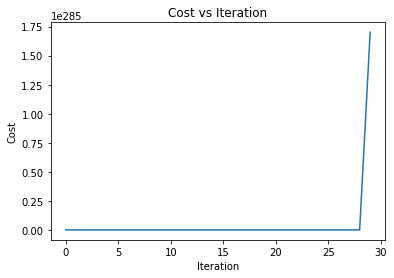

In [15]:
# Parameters to be updated
t0 = 425.599332
t1 = -40.016660
t2 = -0.065413
t3 = -0.004741
t4 = 1341.862121
# x1=[]
# x2=[]
# x3=[]
# x4=[]
# print(x1)
# print(x2)
# print(x3)
# print(x4)
# Data Length
m = float(len(y))

# Epoch [No. of iterations]
epoch = 30

# Learning Rate
alpha =  0.001

# Costs
costs = []

# Batch Gradient Descent
for k in range(epoch):

    _theta_temp_0 = t0 + (alpha / m) * sum([(y[k] - predict(t0,t1,t2,t3,t4,x1[k],x2[k],x3[k],x4[k]))
                                                     for k in range(len(y))
                                                 ])

    _theta_temp_1 = t1 + (alpha / m) * sum([(y[k] - predict(t0,t1,t2,t3,t4,x1[k],x2[k],x3[k],x4[k])) * x1[k]
                                                     for k in range(len(y))
                                                 ])

    _theta_temp_2 = t2 + (alpha / m) * sum([(y[k] - predict(t0,t1,t2,t3,t4,x1[k],x2[k],x3[k],x4[k])) * x2[k]
                                                     for k in range(len(y))
                                                 ])

    _theta_temp_3 = t3 + (alpha / m) * sum([(y[k] - predict(t0,t1,t2,t3,t4,x1[k],x2[k],x3[k],x4[k])) * x3[k]
                                                     for k in range(len(y))
                                                 ])     

    _theta_temp_4 = t4 + (alpha / m) * sum([(y[k] - predict(t0,t1,t2,t3,t4,x1[k],x2[k],x3[k],x4[k])) * x4[k]
                                                     for k in range(len(y))
                                                 ])       



    t0 = _theta_temp_0
    t1 = _theta_temp_1
    t2 = _theta_temp_2
    t3 = _theta_temp_3
    t4 = _theta_temp_4

    # Calculating cost
    cost = computeCost(t0,t1,t2,t3,t4,x1,x2,x3,x4, y)

    # Saving it to the list for future use
    costs.append(cost)

    # Printing cost after each epoch
    print("Cost: {}".format(cost))

# Plotting Cost vs Iteration Graph
plot_cost_vs_iteration(costs)

In [16]:
predict(425.599332,-40.016660,-0.065413,-0.004741,1341.862121,9.0,3571,1976,0.525)

526.9689665249999

In [18]:
Petrol_Consumption = 425.599332+(-40.016660)*9.0	+(-0.065413)*3571+(-0.004741)*1976+1341.862121*0.525
Petrol_Consumption

526.9689665249999

In [ ]:
# Help link
# https://bn.mlmodel.fit/linear-regression/gradient-descent-varieties/